# Baseline Models

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import preprocessing as pp

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="dark")
sns.set(font_scale=1.85)

[nltk_data] Downloading package stopwords to /home/elies/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/elies/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/elies/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## RandomForest

In [3]:
data_file = './datasets/X_y_train.csv'
df = pd.read_csv(data_file, usecols=['text', 'level'])
print(df)

                                                    text  level
0      \r\r\n      Hi! Just some words about the prod...      3
1      \r\r\n      Dear Sir and Madam,I am writing to...      3
2      \r\r\n      Isabella tells John her life and h...      1
3      \r\r\n      From: fabsymon To: Everybody Subje...      1
4      \r\r\n      my name is alison . i live in fren...      0
...                                                  ...    ...
13366  \r\r\n      This week end there will a big con...      1
13367  \r\r\n      Hi, Thank you for sending me the r...      2
13368  \r\r\n      Hello Aunt Jane, I'm happy to help...      1
13369  \r\r\n      I first time a saw my partner, I w...      2
13370  \r\r\n      Dear Ms Thomas, There are thirteen...      0

[13371 rows x 2 columns]


In [4]:
sent_df = pp.get_sentences(df, 'text', 'level')

In [5]:
sentence_df_stats= pp.get_word_stats(df,'text',True)

In [6]:
sentence_df_stats=pd.DataFrame(sentence_df_stats[0], columns=['sum', 'len', 'mean','max','min','avg'])

In [7]:
sentence_df_stats

,sum,len,mean,max,min,avg
0,110,12,9.166667,20,1,5.754545
1,156,7,22.285714,44,14,4.314103
2,71,7,10.142857,16,5,4.605634
3,101,10,10.100000,21,1,4.683168
4,45,4,11.250000,23,5,3.311111
...,...,...,...,...,...,...
13366,34,5,6.800000,10,4,3.852941
13367,90,8,11.250000,18,2,3.944444
13368,64,7,9.142857,29,1,4.406250
13369,118,7,16.857143,28,8,4.525424


In [8]:
# Break the Data Frame into pieces sentence-wise
sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,Hi!,1,2.00,3,0
1,Just some words about the product &quot;Transf...,10,5.70,3,0
2,With $235 the cost is in the average Market.,9,3.78,3,0
3,The important differences are the features.,6,6.17,3,0
4,It's a palm-size which could translates 500 us...,22,4.45,3,0
...,...,...,...,...,...
82368,"he approached me, I answered as I could in Eng...",12,4.08,2,13369
82369,"I became increasingly attracted by his eyes, h...",29,4.62,2,13369
82370,Now I find myself please take English lessons.,8,4.75,2,13369
82371,"Dear Ms Thomas, There are thirteen computers a...",29,5.34,0,13370


In [9]:
data_baseline=sentence_df[["num_of_words","avg_len_words","level"]]

In [10]:
X=sentence_df_stats
y=df["level"]

In [11]:
y,X

(0        3
 1        3
 2        1
 3        1
 4        0
         ..
 13366    1
 13367    2
 13368    1
 13369    2
 13370    0
 Name: level, Length: 13371, dtype: int64,
        sum  len       mean  max  min       avg
 0      110   12   9.166667   20    1  5.754545
 1      156    7  22.285714   44   14  4.314103
 2       71    7  10.142857   16    5  4.605634
 3      101   10  10.100000   21    1  4.683168
 4       45    4  11.250000   23    5  3.311111
 ...    ...  ...        ...  ...  ...       ...
 13366   34    5   6.800000   10    4  3.852941
 13367   90    8  11.250000   18    2  3.944444
 13368   64    7   9.142857   29    1  4.406250
 13369  118    7  16.857143   28    8  4.525424
 13370   31    2  15.500000   28    3  5.580645
 
 [13371 rows x 6 columns])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
modeles = [
    (
        "SVM",
        SVC(),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    ),
    (
        "RandomForest",
        RandomForestClassifier(),
        {
            "n_estimators": [400, 500, 600],
            "criterion": ["gini", "entropy", "log_loss"],
            "class_weight": ["balanced"],
            "max_depth": [50, 100],
        },
    ),
]

In [15]:
for nomModele, modele, param_grid in modeles:
    print(f"Entraînement et optimisation de {nomModele}...")

    # Recherche des meilleurs hyperparamètres par grid search
    grid_search = GridSearchCV(modele, param_grid,n_jobs=-1,verbose=0)
    grid_search.fit(X_train, y_train)

    # Récupérations du modèle avec les meilleurs hyperparamètres
    meilleurModele = grid_search.best_estimator_

    # Réalisation d'une prédiction
    y_pred = meilleurModele.predict(X_test)

    # Evaluation du modèle
    f1 = f1_score(y_test, y_pred,average="weighted")
    accuracy=accuracy_score(y_test,y_pred)
    # Affichage des résultats
    print(f"Model: {nomModele}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"F1-score: {f1}")
    print(f"accuracy: {accuracy}")
    print("------------------------------------")

Entraînement et optimisation de SVM...


Model: SVM
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
F1-score: 0.6686328531285973
accuracy: 0.6766355140186916
------------------------------------
Entraînement et optimisation de RandomForest...
Model: RandomForest
Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 100, 'n_estimators': 500}
F1-score: 0.6613034181009171
accuracy: 0.6631775700934579
------------------------------------


|Model|Hyperparams|score|nbr_colonnes|
|--------------------|-------------------------------------------------------------------------------------------|--------------------|----|
|RandomForest|{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 400}|accuracy=0.299|2 colonnes (avg len et num_of_words)|
|RandomForest|{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 400}|accuracy=0.65|6 colonnes| 
|MLP|{'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}|accuracy=0.6549|6 colonnes| 
|SVM|{'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}|accuracy=0.6549|6 colonnes| 

<Axes: >

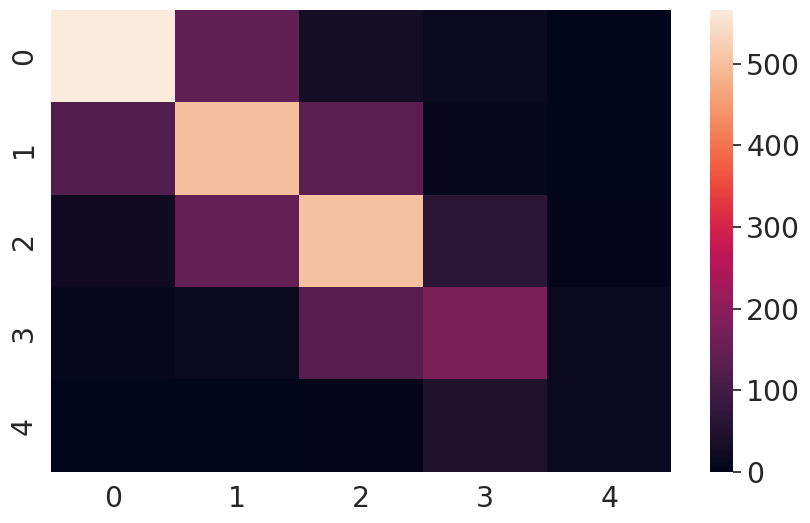

In [16]:
clf = RandomForestClassifier(n_estimators=400, criterion="gini",class_weight="balanced",max_depth=50)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred))

<Axes: >

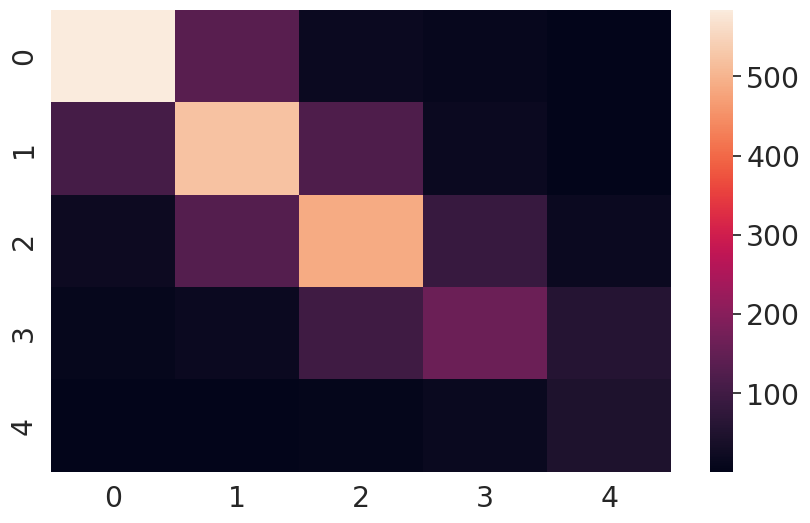

In [17]:
clf_svm=SVC(kernel="rbf",C=10,class_weight="balanced")
clf_svm.fit(X_train,y_train)
y_pred=clf_svm.predict(X_test)
acc=accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred))

In [20]:
data_file = "./datasets/X_test.csv"
df_test = pd.read_csv(data_file, usecols=["text"])

sentence_df_test_stats= pp.get_word_stats(df_test,'text',True)
sentence_df_test_stats=pd.DataFrame(sentence_df_test_stats[0], columns=['sum', 'len', 'mean','max','min','avg'])
sentence_df_test_stats = scaler.transform(sentence_df_test_stats)
ypred = pd.DataFrame(clf_svm.predict(sentence_df_test_stats), columns=["level"])
ypred.to_csv("./soumission_baseline.csv")